# Analysis of XBB15 neutalization by primary exposure sera

### Set up Analysis

In [17]:
import itertools
import math
import os
import re
import warnings

from IPython.display import display, HTML

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import natsort

import numpy as np
import pandas as pd
from plotnine import *

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [18]:
warnings.simplefilter('ignore')

Read config file.

In [19]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Set seaborn theme:

In [20]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data

In [21]:
frac_infect = pd.read_csv(config['serum_neuts_cincinnati'], index_col=0)

## Fit Hill curve to data using [`neutcurve`](https://jbloomlab.github.io/neutcurve/)

In [22]:
fits = neutcurve.CurveFits(frac_infect,  fixtop= True)

In [23]:
fitparams = (
    fits.fitParams(ics=[50, 97, 98, 99, 99.9])
    .assign(NT50=lambda x: 1/x['ic50'])
    )

# couldn't get lambda / conditional statement to work with assign, so try it here:
fitparams['ic50_is_bound'] = fitparams['ic50_bound'].apply(lambda x: True if x!='interpolated' else False)

display(HTML(fitparams.to_html(index=False)))

serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic97,ic97_bound,ic97_str,ic98,ic98_bound,ic98_str,ic99,ic99_bound,ic99_str,ic100,ic100_bound,ic100_str,midpoint,slope,top,bottom,NT50,ic50_is_bound
CC1047,infected,average,2,0.001705,interpolated,0.0017,0.035318,interpolated,0.0353,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.001705,1.146873,True,0,586.574230,False
CC1118,infected,average,2,0.000394,interpolated,0.000394,0.006284,interpolated,0.00628,0.008751,interpolated,0.00875,0.015325,interpolated,0.0153,0.050000,lower,>0.05,0.000394,1.255238,True,0,2537.682982,False
CC1140,infected,average,2,0.001477,interpolated,0.00148,0.017727,interpolated,0.0177,0.023862,interpolated,0.0239,0.039452,interpolated,0.0395,0.050000,lower,>0.05,0.001477,1.398779,True,0,677.059207,False
CC1173,infected,average,2,0.004178,interpolated,0.00418,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.004178,1.012976,True,0,239.370988,False
CC1195,infected,average,2,0.009563,interpolated,0.00956,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.009563,1.122567,True,0,104.572151,False
CC1195,infected+vaccinated,average,2,0.000054,interpolated,5.4e-05,0.000407,interpolated,0.000407,0.000519,interpolated,0.000519,0.000781,interpolated,0.000781,0.002993,interpolated,0.00299,0.000054,1.720327,True,0,18515.023325,False
CC1212,infected,average,2,0.001471,interpolated,0.00147,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.050000,lower,>0.05,0.001471,0.868156,True,0,679.949245,False
CC1212,infected+vaccinated,average,2,0.000049,interpolated,4.91e-05,0.000541,interpolated,0.000541,0.000721,interpolated,0.000721,0.001171,interpolated,0.00117,0.005776,interpolated,0.00578,0.000049,1.448423,True,0,20382.675848,False


## Plot neut curves for mAbs

Saving to cincinnati_neuts.pdf


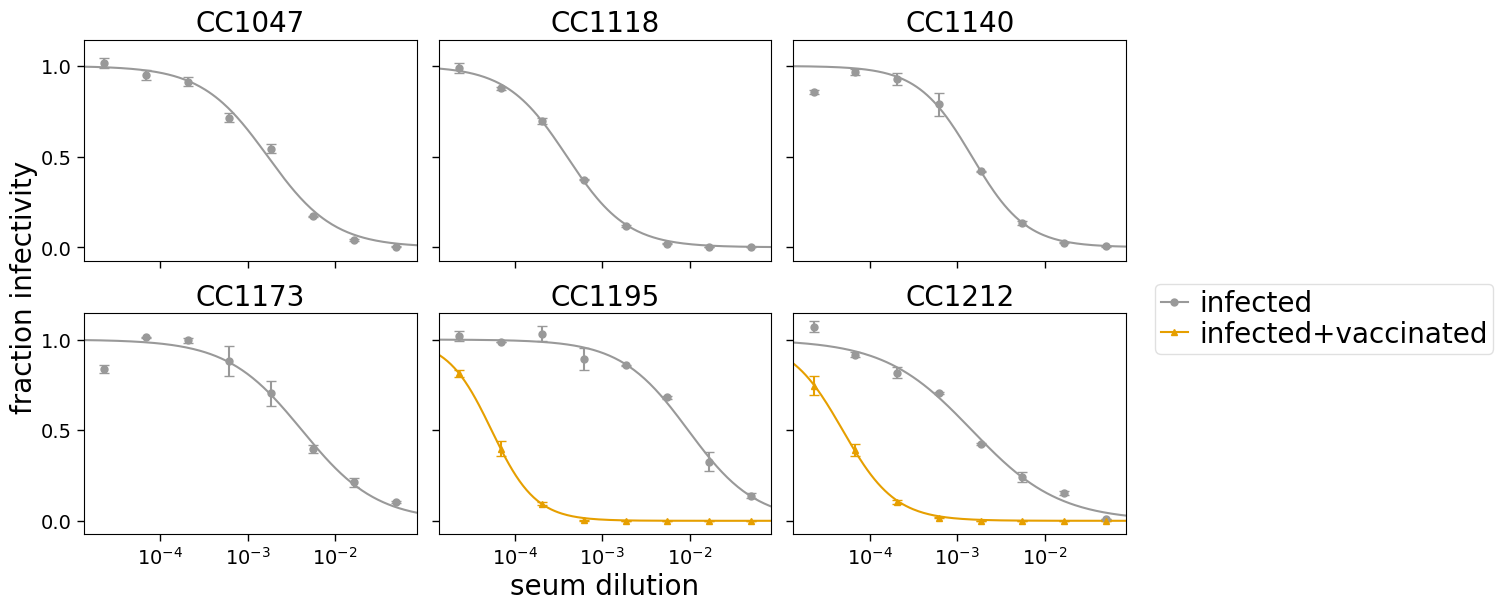

In [25]:
fig, axes = fits.plotSera(xlabel='seum dilution',
                          ncol=3,
                          widthscale=1.2,
                          heightscale=1.2,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                         )
plotfile_pdf = 'cincinnati_neuts.pdf'
plotfile_png = 'cincinnati_neuts.png'
print(f"Saving to {plotfile}")
fig.savefig(f'{resultsdir}/{plotfile_pdf}', bbox_inches='tight')
fig.savefig(f'{resultsdir}/{plotfile_png}', bbox_inches='tight')